<a href="https://colab.research.google.com/github/olusolaag/AI-ML-Projects-2021/blob/main/daily_bike_share_regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
#This ensures plots are  displayed inline in jupyter notebook
%matplotlib inline 

In [127]:
#Load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv

--2021-10-05 19:50:34--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: ‘daily-bike-share.csv.2’

daily-bike-share.cs 100%[===================>]  47.66K  --.-KB/s    in 0.01s   

2021-10-05 19:50:34 (3.55 MB/s) - ‘daily-bike-share.csv.2’ saved [48800/48800]



In [128]:
bike_data = pd.read_csv('/content/daily-bike-share.csv')

In [129]:
bike_data.shape

(731, 14)

In [130]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [131]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000


In [132]:
bike_data.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120


In [133]:
#create a column for day of the week: RETURNS 1-31
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data[:3]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3


In [134]:
numeric_features = ['temp','atemp','hum','windspeed']
categorial_features = ['season','yr','mnth','holiday',	'weekday',	'workingday',	'weathersit','day']

In [135]:
bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


In [136]:
X = bike_data[numeric_features + categorial_features]
y = bike_data['rentals']
print("printing features ....\n\n",X.head())
print("printing labels ....\n\n",y[:3])

printing features ....

        temp     atemp       hum  ...  workingday  weathersit  day
0  0.344167  0.363625  0.805833  ...           0           2    1
1  0.363478  0.353739  0.696087  ...           0           2    2
2  0.196364  0.189405  0.437273  ...           1           1    3
3  0.200000  0.212122  0.590435  ...           1           1    4
4  0.226957  0.229270  0.436957  ...           1           1    5

[5 rows x 12 columns]
printing labels ....

 0    331
1    131
2    120
Name: rentals, dtype: int64


In [137]:
X.isnull().sum()

temp          0
atemp         0
hum           0
windspeed     0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
day           0
dtype: int64

In [138]:
print("X shape: \n", X.shape)
print('y shape: \n', y.shape)

X shape: 
 (731, 12)
y shape: 
 (731,)


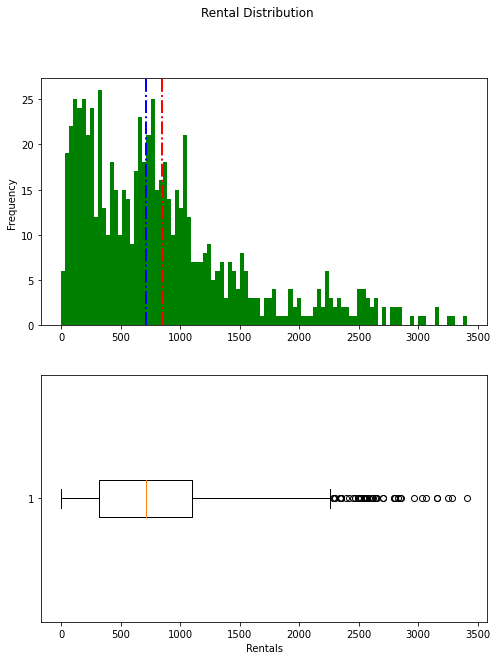

In [139]:
#visualize rentals distribution

#get the label column
label = bike_data['rentals']

#create a figure for 2 subplots (2 rows and 1 column)
fig, ax = plt.subplots(2,1, figsize = (8,10))

#plot histogram
ax[0].hist(label, bins=100, color='green')
ax[0].set_ylabel('Frequency')

#Add line for the mean and median
ax[0].axvline(label.mean(), color='red', linestyle='dashdot', linewidth=2)
ax[0].axvline(label.median(), color='blue', linestyle='dashdot', linewidth=2)

#plot boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

#Add title to figure
fig.suptitle('Rental Distribution')
fig.show()

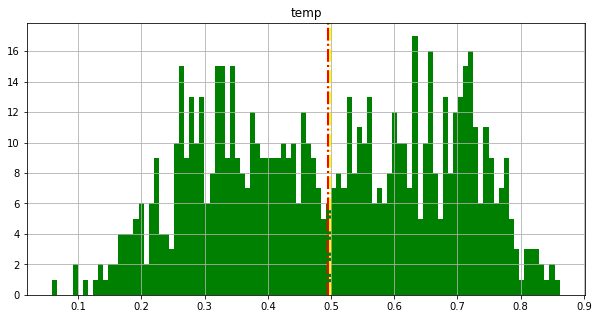

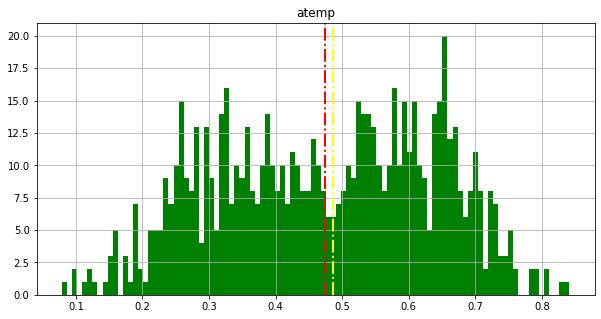

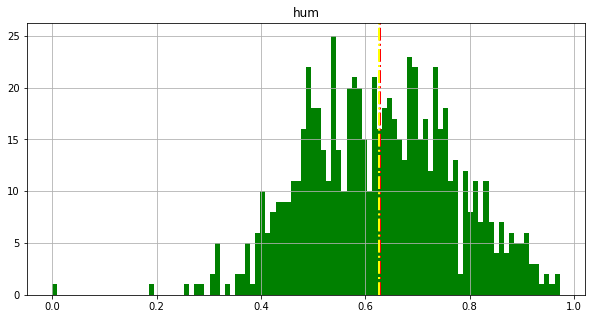

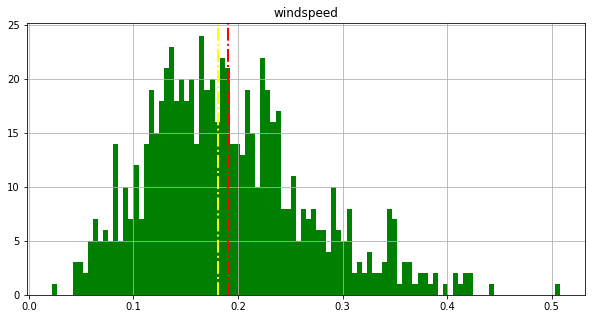

In [140]:
#create visualization for numeric features
for col in numeric_features:
  fig = plt.figure(figsize=(10,5))
  ax = fig.gca() #get the current Axes instance on the current figure mmatching the keyword args or create one
  feature = bike_data[col]
  feature.hist(bins=100, ax=ax, color='green')
  ax.axvline(feature.mean(), color='red', linestyle='dashdot', linewidth=2)
  ax.axvline(feature.median(), color='yellow', linestyle='dashdot', linewidth=2)
  ax.set_title(col)
  plt.show()

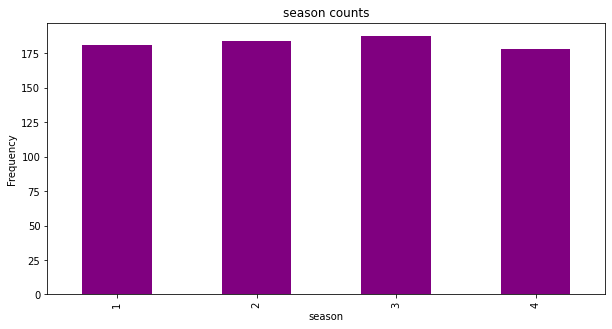

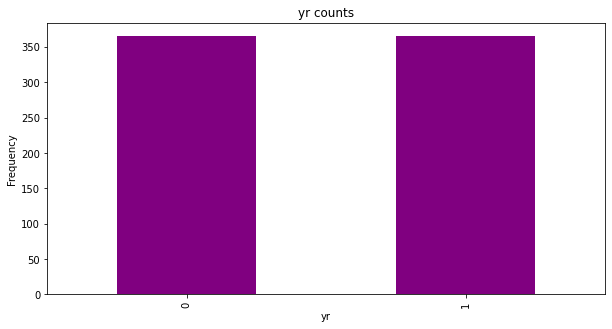

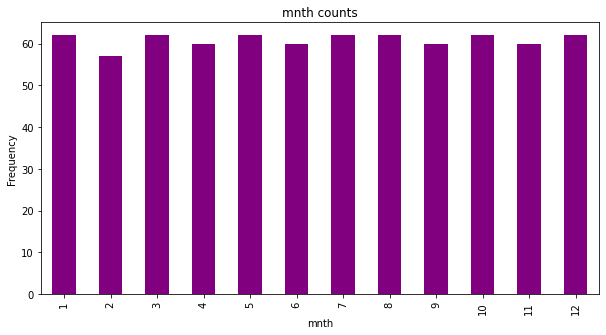

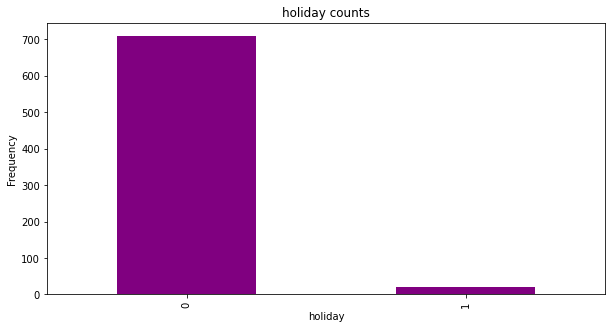

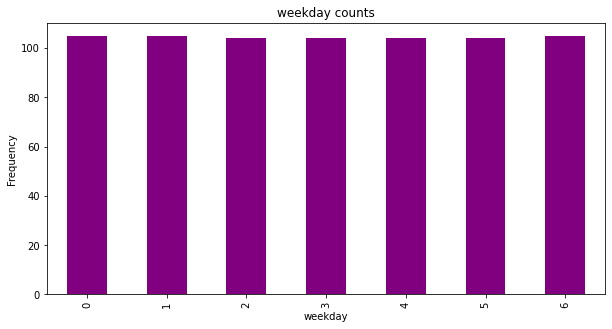

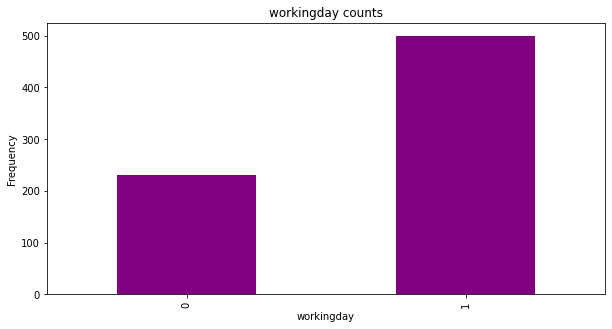

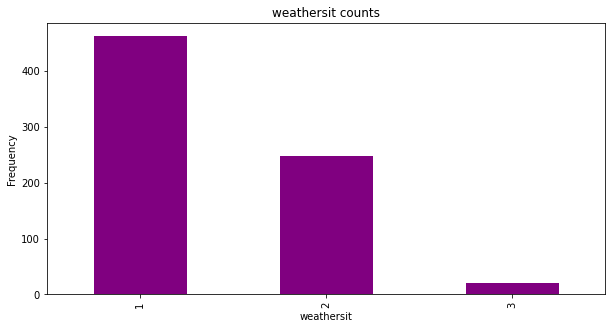

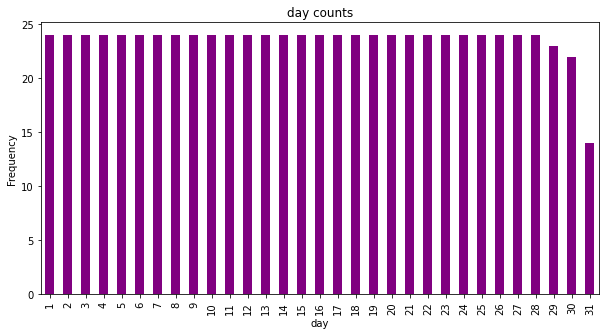

'\nseason: A numerically encoded value indicating the season (1:spring, 2:summer, 3:fall, 4:winter)\nyr: The year of the study in which the observation was made (the study took place over two years - year 0 represents 2011, and year 1 represents 2012)\nholiday: A binary value indicating whether or not the observation was made on a public holiday)\nweekday: The day of the week on which the observation was made (0:Sunday ... 6:Saturday)\nworkingday: A binary value indicating whether or not the day is a working day (not a weekend or holiday)\nweathersit: A categorical value indicating the weather situation (1:clear, 2:mist/cloud, 3:light rain/snow, 4:heavy rain/hail/snow/fog)\n'

In [141]:
#create visualization for categorical features

#plot a bar plot for each categorical feature count

for col in categorial_features:
  counts = bike_data[col].value_counts().sort_index()
  fig = plt.figure(figsize=(10,5))
  ax = fig.gca() #get the current Axes instance on the current figure mmatching the keyword args or create one
  counts.plot.bar(ax=ax,color='purple')
  ax.set_title(col + ' counts')
  ax.set_xlabel(col)
  ax.set_ylabel('Frequency')
plt.show()

'''
season: A numerically encoded value indicating the season (1:spring, 2:summer, 3:fall, 4:winter)
yr: The year of the study in which the observation was made (the study took place over two years - year 0 represents 2011, and year 1 represents 2012)
holiday: A binary value indicating whether or not the observation was made on a public holiday)
weekday: The day of the week on which the observation was made (0:Sunday ... 6:Saturday)
workingday: A binary value indicating whether or not the day is a working day (not a weekend or holiday)
weathersit: A categorical value indicating the weather situation (1:clear, 2:mist/cloud, 3:light rain/snow, 4:heavy rain/hail/snow/fog)
'''


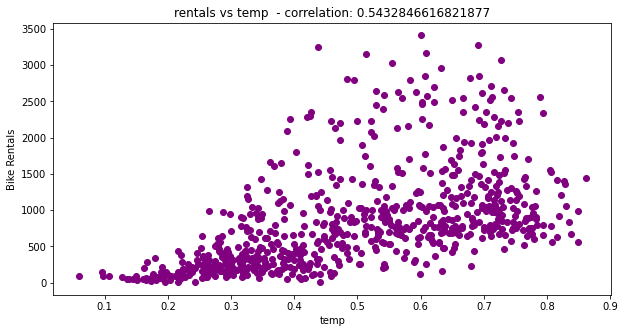

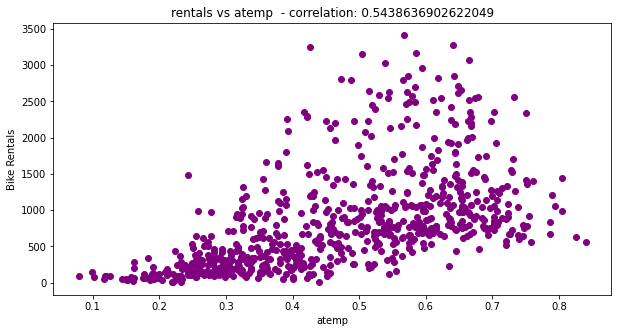

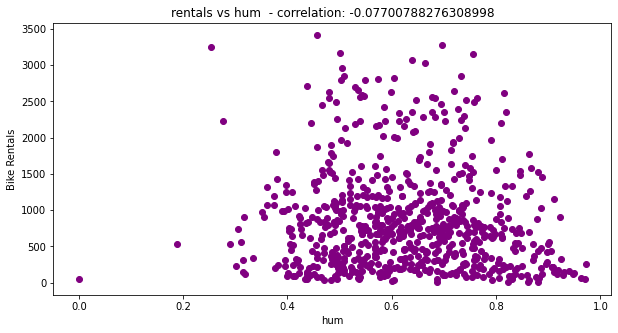

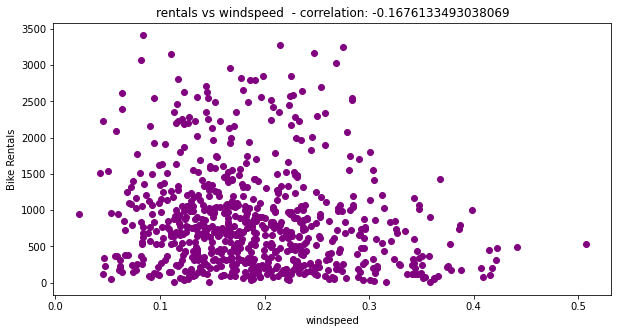

In [142]:
#visualize the relationship between the numerical features and rentals (label) and determine the correlation coefficient between them

#Correlation coefficients are indicators of the strength of the linear relationship between two different variables, x and y. 
#A linear correlation coefficient that is greater than zero indicates a positive relationship. 
#A value that is less than zero signifies a negative relationship. 
#Finally, a value of zero indicates no relationship between the two variables x and y

for col in numeric_features:
  fig = plt.figure(figsize=(10,5))
  ax = fig.gca() #get the current Axes instance on the current figure mmatching the keyword args or create one
  feature = bike_data[col]
  label = bike_data['rentals']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label, color='purple')

  plt.xlabel(col)
  plt.ylabel('Bike Rentals')
  ax.set_title('rentals vs ' + col + '  - correlation: ' + str(correlation))
plt.show()


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

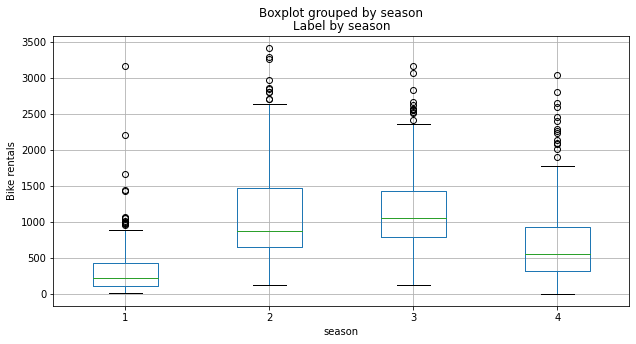

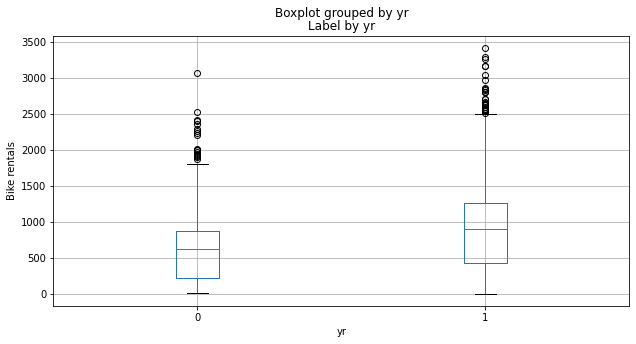

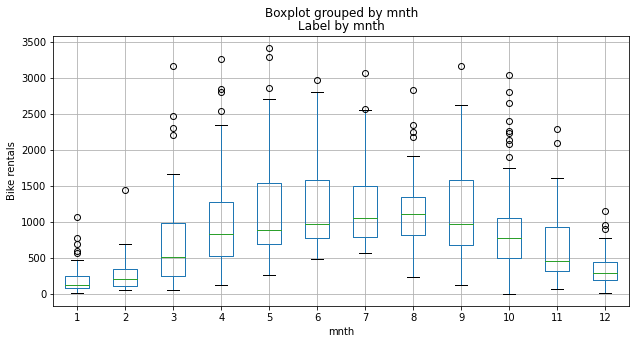

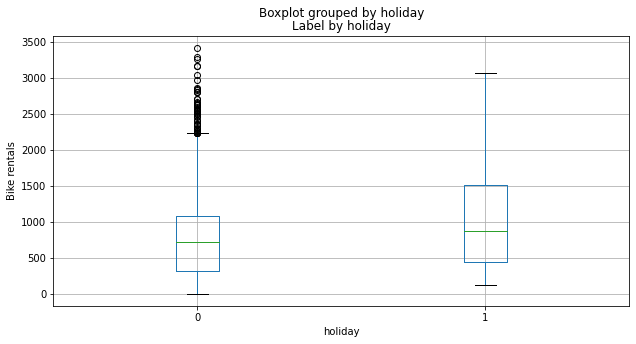

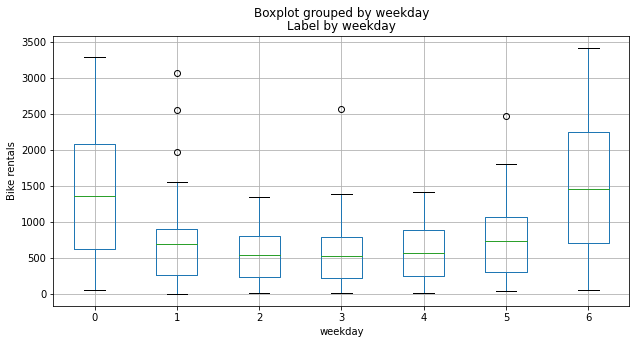

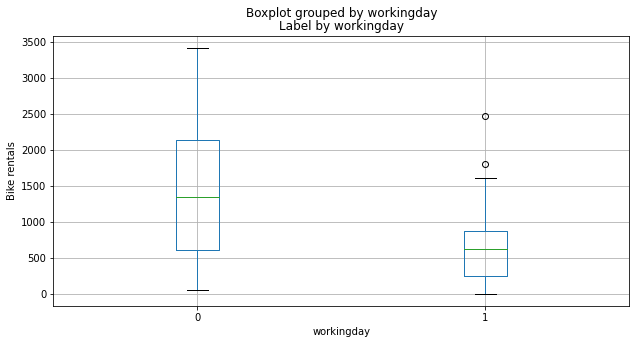

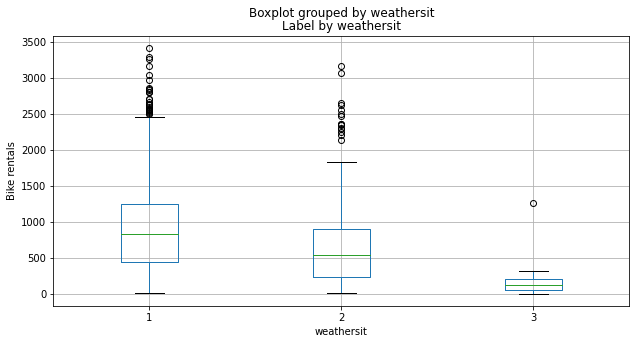

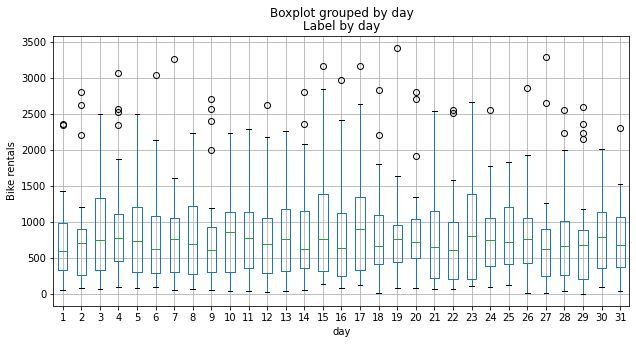

In [143]:
# compare each categorical features to label (rentals)

for col in categorial_features:
  fig = plt.figure(figsize=(10,5))
  ax = fig.gca() #get the current Axes instance on the current figure mmatching the keyword args or create one
  bike_data.boxplot(column='rentals', by=col, ax=ax)
  ax.set_ylabel('Bike rentals')
  ax.set_title('Label by ' + col)
plt.show()

In [144]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [145]:
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


In [146]:
from sklearn.linear_model import Lasso

#fit a lasso model on the training set
model = Lasso().fit(X_train,y_train)
print(model)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [147]:
#Evaluate the model using test data

predictions = model.predict(X_test)

In [148]:
#compute the mean-squre-error of the prediction

mse = mean_squared_error(y_test, predictions)
print("MSE: ",mse)

#compute the root-mean-squre-error
rmse = np.sqrt(mse)
print("RMSE: ",rmse)

#compute the r2-score (coefficient of determination)
r2 = r2_score(y_test, predictions) # The closer the value is to 1 the better
print("r2-score: ",r2)

MSE:  170132.30866888165
RMSE:  412.47097918384713
r2-score:  0.6664662869780855


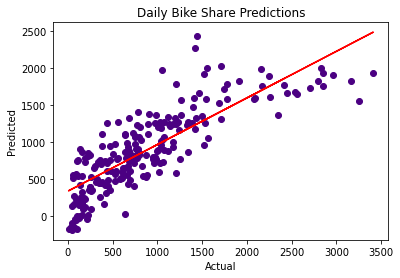

In [149]:
#plot the predicted vs actual
plt.scatter(y_test,predictions, color='indigo')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Daily Bike Share Predictions')
#draw the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

DecisionTreeRegressor(ccp_alpha=0.1, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') 

MSE 148881.2884709375
RMSE:  385.85138132568284
R2:  0.708127578284717


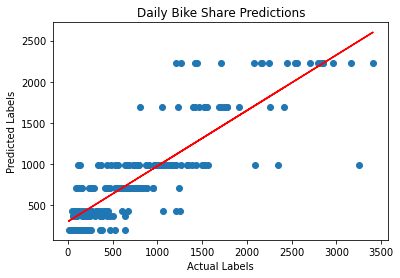

In [186]:
#DecisionTree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
#train the model
dt = DecisionTreeRegressor(ccp_alpha=0.1, max_depth=3).fit(X_train, y_train)
print(dt, "\n")

# visualize the model tree
# tree = export_text(dt)
# print(tree)

# Evaluate the model
predictions = dt.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)
r2 = r2_score(y_test, predictions)
print("R2: ", r2)
# plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel("Actual Labels")
plt.ylabel('Predicted Labels')

plt.title('Daily Bike Share Predictions')
#draw the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

RandomForestRegressor(bootstrap=True, ccp_alpha=0.7, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 

MSE 94992.89327167616
RMSE:  308.20917129715036
R2:  0.8137723948408884


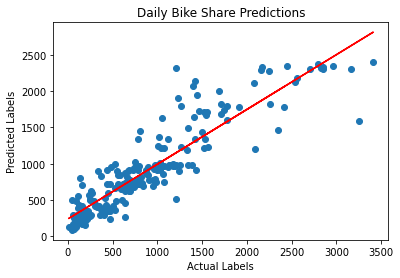

In [181]:
#Ensemble method - RandomForestRegressor (bagging - applies averaging fxn to multiple decision trees) 
from sklearn.ensemble import RandomForestRegressor

#train the model
rf = RandomForestRegressor(ccp_alpha=0.7, criterion='mse',max_depth=5).fit(X_train, y_train)
print(rf, "\n")

# Evaluate the model
predictions = rf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)
r2 = r2_score(y_test, predictions)
print("R2: ", r2)
# plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel("Actual Labels")
plt.ylabel('Predicted Labels')

plt.title('Daily Bike Share Predictions')
#draw the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

MSE 72715.50373280795
RMSE:  269.65812380272905
R2:  0.8574458188217229


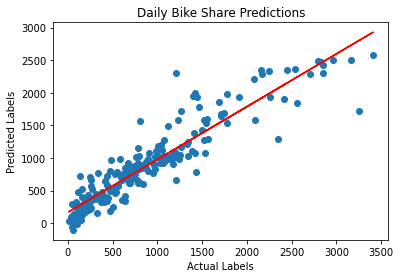

In [184]:
#Ensemble method - GradientBoostingRegressor (boosting - builds each tree on the output of the previous in an attempt to incrementally reduce the loss in the model) 
from sklearn.ensemble import GradientBoostingRegressor

#train the model
gbr = GradientBoostingRegressor().fit(X_train, y_train)
print(gbr, "\n")

# Evaluate the model
predictions = gbr.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)
r2 = r2_score(y_test, predictions)
print("R2: ", r2)
# plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel("Actual Labels")
plt.ylabel('Predicted Labels')

plt.title('Daily Bike Share Predictions')
#draw the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()
